In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
# Set a seed value
seed_value= 12321 
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)
# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
# tf.set_random_seed(seed_value)

In [2]:
import os
os.path.exists('/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/data/preprocessed_data.csv')


True

In [3]:
loc ='/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/data/preprocessed_data.csv'

data = pd.read_csv(loc,index_col=0)
# data.index = np.arange(0, len(data))
data = data.drop('X', axis = 1)

X = data.drop('AGE',axis = 1)
Y = data['AGE']

X_norm = (X-X.mean())/X.std()
X_norm['AGE']=Y

# data = pd.read_csv(loc,index_col=0)
# data.index = np.arange(0, len(data1))
data = data.drop('PERC_SOCIAL_NETWORK_SESSIONS_IN_P1', axis = 1)

data_norm = X_norm
out_idx = np.where(np.abs(X_norm-X_norm.mean(axis = 0)) > (2*X_norm.std()))[0]
out_idx = np.unique(out_idx)
data_non_outlier = data_norm.drop(data_norm.index[out_idx])

# data_new = data_non_outlier
data_new = data
X_new = data_new.drop('AGE',axis = 1)
Y_new = data_new['AGE'].astype(np.float32)

datax = X_new.values
datay = Y_new.values

data.shape


(11826, 12)

In [4]:
loc ='/Users/samruda/Downloads/Lidakld-cs597-b2dec37d2c5b-2/data/data.csv'

actual_data = pd.read_csv(loc,index_col=0)
actual_data.index = np.arange(1, len(actual_data)+1)
# gender_data = actual_data
# gender_data.assign(Gender = actual_data["GENDER"])

actual_data_subset = actual_data[['RECHARGE_VALUE',
 'MIN_RECHARGE_AVG',
 'P2_MADE_CALLS_DURATION',
 'P2_PERC_DAYS_SOCIAL_NETWORK_OTT',
 'PERC_INTERNET_SESSIONS_IN_P1',
 'PERC_RECEIVED_CALLS_DURATION_IN_P2',
 'PERC_P4_RECEIVED_CALLS_DURATION_BY_TOTAL',
 'P23_PERC_DAYS_MADE_CALLS_OTT',
 'WEEKDAY_PERC_INTERNET_MB',
 'WEEKEND_HOLYDAY_PERC_SOCIAL_NETWORK_SESSIONS',
 'WEEKEND_HOLYDAY_P14_WHATSAPP_MB_BY_SESSION',
 'AGE']]
    
selected_rows_df = [] 
for i in range(1, len(data)+1):
    selected_rows_df.append(actual_data_subset.index[
        (actual_data_subset['RECHARGE_VALUE'] == data['RECHARGE_VALUE'][i]) &
         (actual_data_subset['MIN_RECHARGE_AVG']== data['MIN_RECHARGE_AVG'][i]) &
         (actual_data_subset['P2_MADE_CALLS_DURATION'] ==data['P2_MADE_CALLS_DURATION'][i]) &
         (actual_data_subset['P2_PERC_DAYS_SOCIAL_NETWORK_OTT'] == data['P2_PERC_DAYS_SOCIAL_NETWORK_OTT'][i]) &
         (actual_data_subset['PERC_INTERNET_SESSIONS_IN_P1'] == data['PERC_INTERNET_SESSIONS_IN_P1'][i]) &
         (actual_data_subset['PERC_RECEIVED_CALLS_DURATION_IN_P2'] == data['PERC_RECEIVED_CALLS_DURATION_IN_P2'][i]) &
         (actual_data_subset['PERC_P4_RECEIVED_CALLS_DURATION_BY_TOTAL'] ==  data['PERC_P4_RECEIVED_CALLS_DURATION_BY_TOTAL'][i]) &
         (actual_data_subset['P23_PERC_DAYS_MADE_CALLS_OTT'] == data['P23_PERC_DAYS_MADE_CALLS_OTT'][i]) &
         (actual_data_subset['WEEKDAY_PERC_INTERNET_MB'] == data['WEEKDAY_PERC_INTERNET_MB'][i]) &
         (actual_data_subset['WEEKEND_HOLYDAY_PERC_SOCIAL_NETWORK_SESSIONS'] == data['WEEKEND_HOLYDAY_PERC_SOCIAL_NETWORK_SESSIONS'][i]) &
         (actual_data_subset['WEEKEND_HOLYDAY_P14_WHATSAPP_MB_BY_SESSION'] == data['WEEKEND_HOLYDAY_P14_WHATSAPP_MB_BY_SESSION'][i]) &
         (actual_data_subset['AGE'] == data['AGE'][i])])
    

from setuptools.namespaces import flatten
len(list(flatten(selected_rows_df)))

gender_df = pd.DataFrame( columns = ['RECHARGE_VALUE',
 'MIN_RECHARGE_AVG',
 'P2_MADE_CALLS_DURATION',
 'P2_PERC_DAYS_SOCIAL_NETWORK_OTT',
 'PERC_INTERNET_SESSIONS_IN_P1',
 'PERC_RECEIVED_CALLS_DURATION_IN_P2',
 'PERC_P4_RECEIVED_CALLS_DURATION_BY_TOTAL',
 'P23_PERC_DAYS_MADE_CALLS_OTT',
 'WEEKDAY_PERC_INTERNET_MB',
 'WEEKEND_HOLYDAY_PERC_SOCIAL_NETWORK_SESSIONS',
 'WEEKEND_HOLYDAY_P14_WHATSAPP_MB_BY_SESSION',
 'AGE',
 'GENDER'])

for i in list(flatten(selected_rows_df)):
    gender_df.loc[i] = [actual_data['RECHARGE_VALUE'][i], 
    actual_data['MIN_RECHARGE_AVG'][i],
    actual_data['P2_MADE_CALLS_DURATION'][i],
    actual_data[ 'P2_PERC_DAYS_SOCIAL_NETWORK_OTT'][i],
    actual_data['PERC_INTERNET_SESSIONS_IN_P1'][i],
    actual_data['PERC_RECEIVED_CALLS_DURATION_IN_P2'][i], 
    actual_data['PERC_P4_RECEIVED_CALLS_DURATION_BY_TOTAL'][i],
    actual_data['P23_PERC_DAYS_MADE_CALLS_OTT'][i],
    actual_data['WEEKDAY_PERC_INTERNET_MB'][i], 
    actual_data['WEEKEND_HOLYDAY_PERC_SOCIAL_NETWORK_SESSIONS'][i], 
    actual_data['WEEKEND_HOLYDAY_P14_WHATSAPP_MB_BY_SESSION'][i],
    actual_data['AGE'][i],
    actual_data['GENDER'][i]]
    

In [5]:
actual_data.shape,gender_df.shape  #(11826, 12) <- age data shape
# gender_df['PERC_INTERNET_SESSIONS_IN_P1']
col_gender = gender_df['GENDER']
X = gender_df.drop(['AGE','GENDER'],axis = 1)
Y = gender_df['AGE']

X_norm = (X-X.mean())/X.std()
X_norm['AGE']=Y

# data = pd.read_csv(loc,index_col=0)
# data.index = np.arange(0, len(data1))
# gender_df = gender_df.drop('PERC_SOCIAL_NETWORK_SESSIONS_IN_P1', axis = 1)

data_norm = X_norm
out_idx = np.where(np.abs(X_norm-X_norm.mean(axis = 0)) > (2*X_norm.std()))[0]
out_idx = np.unique(out_idx)
data_non_outlier = data_norm.drop(data_norm.index[out_idx])

data_new = data_non_outlier
# data_new = gender_df
X_new = data_new.drop(['AGE'],axis = 1).astype(np.float32)
Y_new = data_new['AGE'].astype(np.float32)

datax = X_new.values
datay = Y_new.values

gender_df.shape,col_gender.shape

((10920, 13), (10920,))

In [6]:
datay = datay - 13

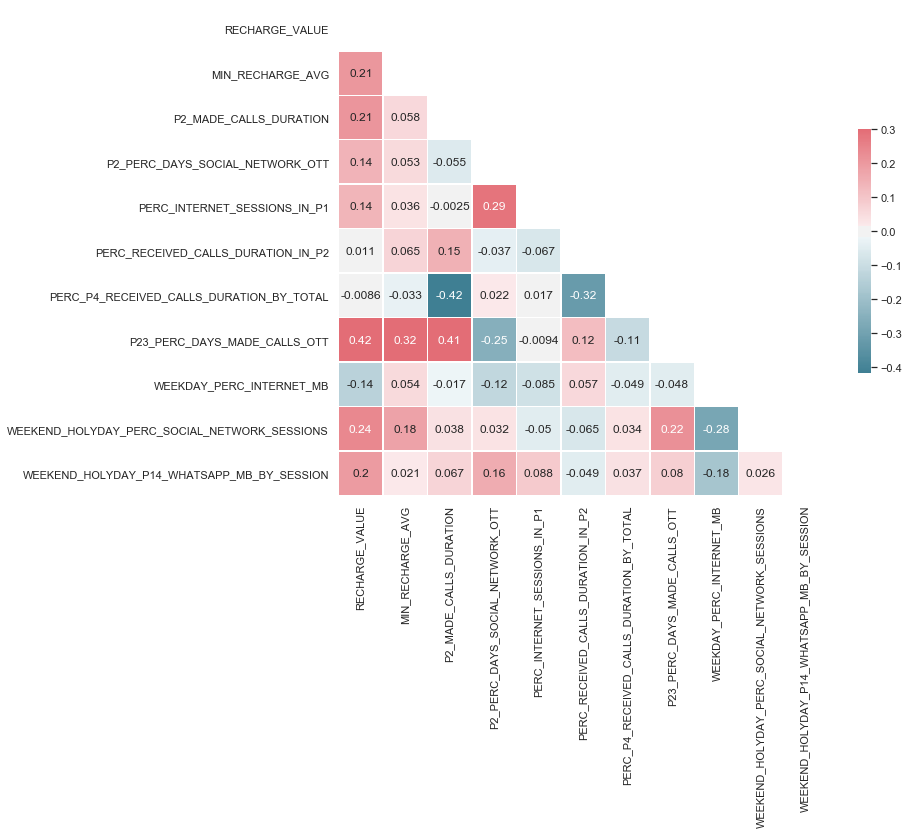

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = data_new.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [20]:
def build_model():

    model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(11, activation=tf.nn.relu,input_shape = (5976, 11)),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(36, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(108, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(48, activation=tf.nn.softmax)
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [12]:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [1000s]')
#     plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']), 
#                label='Val loss')
#     plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
#                label = 'Train Loss')
#     plt.legend()
#     plt.ylim([0,20])
        
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

In [22]:
# The patience parameter is the amount of epochs to check for improvement.
from numpy.random import seed
five_year_acc_array = []
precise_acc_array= []
two_year_acc_array = []
three_year_acc_array = []
four_year_acc_array = []

five_year_acc_array_trn = []
precise_acc_array_trn = []
two_year_acc_array_trn = []
three_year_acc_array_trn = []
four_year_acc_array_trn = []

for i in range(0,10):
    print("step:",i)
    sd = [38, 16, 75, 85]
    seed(sd)
    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

    EPOCHS = 100
    result_two = []

    trainx, testx, trainy, testy = train_test_split(datax, datay, test_size=0.2, random_state = 1)
    model = build_model()
    from sklearn.metrics import accuracy_score
    history = model.fit(trainx.copy(), trainy.copy(), epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])
    # plot_history(history)
    
    y_h = model.predict(testx) # get prediction
    y_hat = []
    for i in range(len(y_h)):
        y_hat.append(np.argmax(y_h[i]))
    #y_hat_rd = np.round(y_hat) # round prediction into int value
    precise_acc = len(np.argwhere(y_hat == testy))/len(y_hat) # compute precise accuracy(no tolerance)
    two_year_acc = len(np.argwhere(np.abs(y_hat-testy<=2)))/len(y_hat) # compute accuracy with two year tolerance
    three_year_acc = len(np.argwhere(np.abs(y_hat-testy<=3)))/len(y_hat)
    four_year_acc = len(np.argwhere(np.abs(y_hat-testy<=4)))/len(y_hat)
    five_year_acc = len(np.argwhere(np.absolute(y_hat-testy<=5)))/len(y_hat) # compute accuracy with five year tolerance

    y_h = model.predict(trainx) # get prediction
    y_hat = []
    for i in range(len(y_h)):
        y_hat.append(np.argmax(y_h[i]))
        
    precise_acc_trn = len(np.argwhere(y_hat == trainy))/len(y_hat) # compute precise accuracy(no tolerance)
    two_year_acc_trn = len(np.argwhere(np.abs(y_hat-trainy<=2)))/len(y_hat) # compute accuracy with two year tolerance
    three_year_acc_trn = len(np.argwhere(np.abs(y_hat-trainy<=3)))/len(y_hat)
    four_year_acc_trn = len(np.argwhere(np.abs(y_hat-trainy<=4)))/len(y_hat)
    five_year_acc_trn = len(np.argwhere(np.absolute(y_hat-trainy<=5)))/len(y_hat)
    
    five_year_acc_array_trn.append(five_year_acc_trn)
    precise_acc_array_trn.append(precise_acc_trn)
    two_year_acc_array_trn.append(two_year_acc_trn)
    three_year_acc_array_trn.append(three_year_acc_trn)
    four_year_acc_array_trn.append(four_year_acc_trn)
    
    five_year_acc_array.append(five_year_acc)
    precise_acc_array.append(precise_acc)
    two_year_acc_array.append(two_year_acc)
    three_year_acc_array.append(three_year_acc)
    four_year_acc_array.append(four_year_acc)
    

model.save("/Users/samruda/Predicting-User-Age-by-Mobile-Phone-Meta-Data/cs597_project/model.h5")

step: 0
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ve

In [32]:
print("All test accuracies ")
print("Average 5 year tolerance accuracy",round(np.mean(five_year_acc_array),2),"\n\n",
      [round(x,2) for x in (five_year_acc_array)])
print("\nAverage precise accuracy ",round(np.mean(precise_acc_array),2),"\n\n",
      "Accuracies accross 10 runs:" , [round(x,2) for x in precise_acc_array])
print("\nAverage 2 year tolerance accuracy",round(np.mean(two_year_acc_array),2),"\n\n",
      "Accuracies accross 10 runs:",[round(x,2) for x in two_year_acc_array])
print("\nAverage 3 year tolerance accuracy",round(np.mean(three_year_acc_array),2),"\n\n",
      "Accuracies accross 10 runs:",[round(x,2) for x in three_year_acc_array])
print("\nAverage 4 year tolerance accuracy",round(np.mean(four_year_acc_array),2),"\n\n",
      "Accuracies accross 10 runs:",[round(x,2) for x in four_year_acc_array])

All test accuracies 
Average 5 year tolerance accuracy 0.77 

 [0.77, 0.79, 0.76, 0.75, 0.79, 0.77, 0.77, 0.77, 0.77, 0.78]

Average precise accuracy  0.06 

 Accuracies accross 10 runs: [0.06, 0.06, 0.06, 0.07, 0.06, 0.06, 0.07, 0.06, 0.06, 0.05]

Average 2 year tolerance accuracy 0.66 

 Accuracies accross 10 runs: [0.65, 0.68, 0.64, 0.64, 0.67, 0.64, 0.67, 0.66, 0.66, 0.66]

Average 3 year tolerance accuracy 0.7 

 Accuracies accross 10 runs: [0.69, 0.72, 0.68, 0.69, 0.7, 0.69, 0.7, 0.69, 0.7, 0.71]

Average 4 year tolerance accuracy 0.73 

 Accuracies accross 10 runs: [0.72, 0.75, 0.71, 0.72, 0.73, 0.72, 0.73, 0.72, 0.73, 0.73]


##Accuracies accross genders

In [34]:
y_h = model.predict(trainx) # get prediction
y_hat = []
for i in range(len(y_h)):
     y_hat.append(np.argmax(y_h[i]))
        
precise_acc_trn = len(np.argwhere(y_hat == trainy))/len(y_hat) # compute precise accuracy(no tolerance)
two_year_acc_trn = len(np.argwhere(np.abs(y_hat-trainy<=2)))/len(y_hat) # compute accuracy with two year tolerance
three_year_acc_trn = len(np.argwhere(np.abs(y_hat-trainy<=3)))/len(y_hat)
four_year_acc_trn = len(np.argwhere(np.abs(y_hat-trainy<=4)))/len(y_hat)
five_year_acc_trn = len(np.argwhere(np.absolute(y_hat-trainy<=5)))/len(y_hat)

In [68]:
f_count = 0
m_count = 0
for i in np.argwhere(np.absolute(y_hat==trainy)):
    if list(col_gender)[i[0]+1] == 'F':
        f_count=f_count+1
    else:
        m_count=m_count+1

In [69]:
print("Male count (precise accuracy):",m_count,"\n" 
      "Female count (precise accuracy):",f_count )

Male count (precise accuracy): 241 
Female count (precise accuracy): 238


In [62]:
f_count = 0
m_count = 0
for i in np.argwhere(np.absolute(y_hat-trainy<=5)):
    if list(col_gender)[i[0]+1] == 'F':
        f_count=f_count+1
    else:
        m_count=m_count+1

In [63]:
print("Male count (5 years of difference accuracy):",m_count,"\n" 
      "Female count (5 years of difference accuracy):",f_count )

Male count (5 years of difference accuracy): 2295 
Female count (5 years of difference accuracy): 2163
